In [1]:
!pip install rplanpy

C:\Users\aswin\AppData\Local\Temp\ipykernel_21468\3614996098.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
c:\Users\aswin\anaconda3\envs\opentensor\lib\site-packages\rplanpy\data.py:53: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  c = stats.mode(
c:\Users\aswin\anaconda3\envs\opentensor\lib\site-packages\rplanpy\data.py:

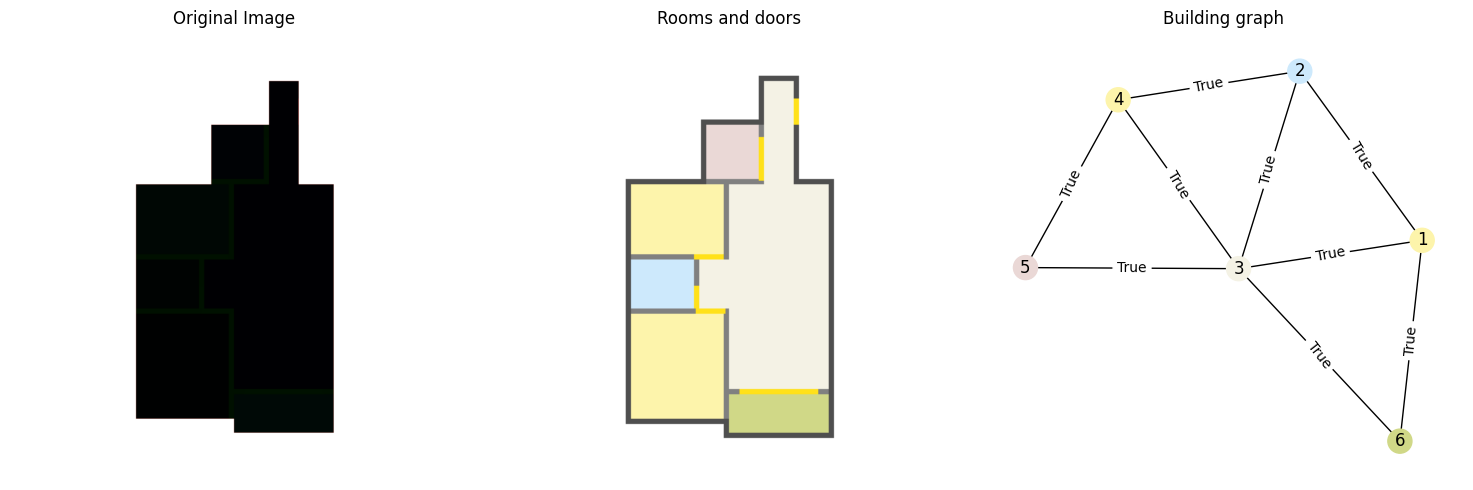

In [2]:
import rplanpy
import imageio
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3,figsize=(15,5))
data=rplanpy.data.RplanData(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
image=imageio.imread(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
ax[0].imshow(image,cmap='gray')
ax[0].axis("off")
ax[0].set_title("Original Image")
rplanpy.plot.plot_floorplan(data, ax=ax[1], title="Rooms and doors")
rplanpy.plot.plot_floorplan_graph(
    data=data, with_colors=True, edge_label='door', ax=ax[2],
    title="Building graph"
)
plt.tight_layout()
plt.show()

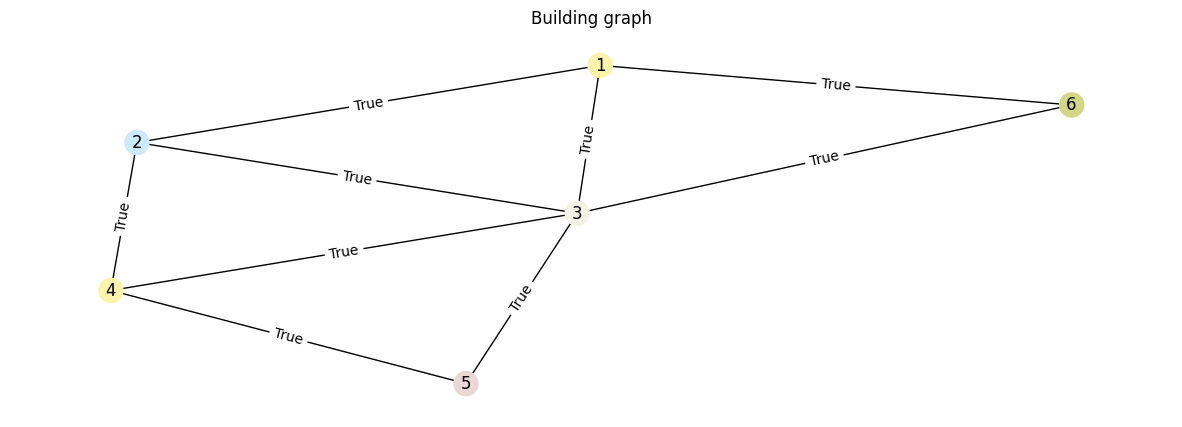

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
rplanpy.plot.plot_floorplan_graph(
    data=data, with_colors=True, edge_label='door', ax=ax,
    title="Building graph"
)
plt.savefig('build_graph1.png')
plt.show()

c:\Users\aswin\anaconda3\envs\opentensor\lib\site-packages\rplanpy\data.py:53: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  c = stats.mode(
c:\Users\aswin\anaconda3\envs\opentensor\lib\site-packages\rplanpy\data.py:58: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


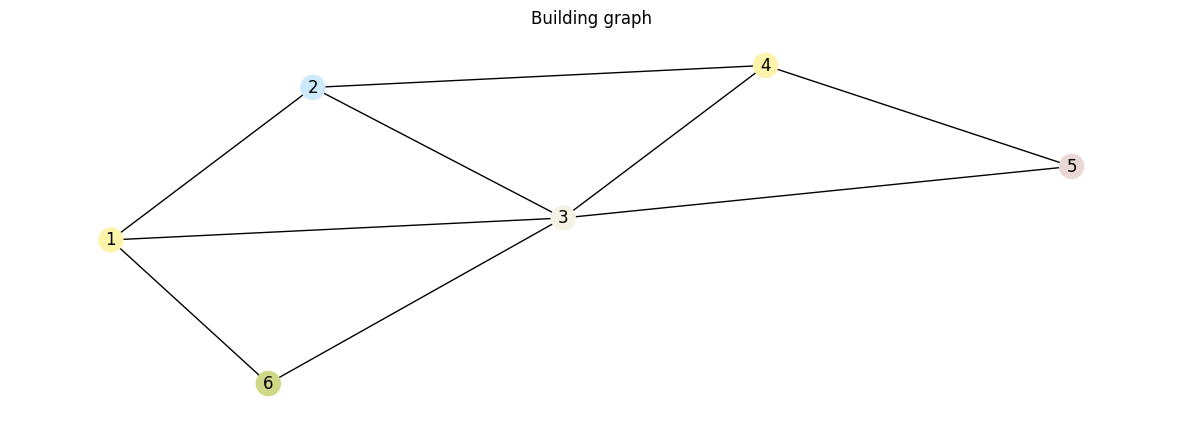

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
rplanpy.plot.plot_floorplan_graph(
    data=data, with_colors=True, edge_label=None, ax=ax,
    title="Building graph"
)
# plt.savefig('build_graph.png')
plt.show()

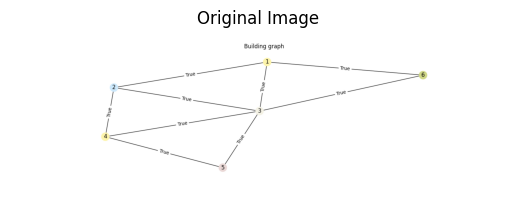

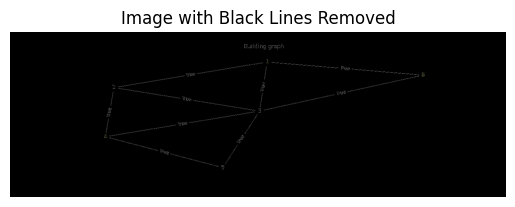

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'your_image.jpg' with your image file path)
image = cv2.imread('build_graph1.png')

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary mask
_, binary_mask = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY)

# Invert the binary mask
inverted_mask = cv2.bitwise_not(binary_mask)

# Create a white background image
white_background = np.ones_like(image) * 255

# Merge the original image with the white background using the inverted mask
result_image = cv2.bitwise_and(white_background, image, mask=inverted_mask)

# Display the result (image with black lines removed)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image with Black Lines Removed')
plt.show()


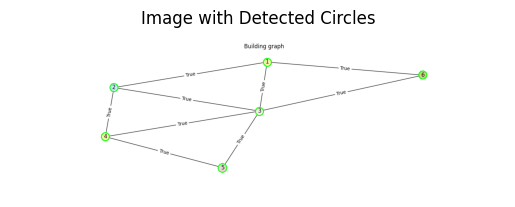

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'your_image.jpg' with your image file path)
image = cv2.imread('build_graph1.png')

# Create a copy of the original image to work with
result_image = image.copy()

# Convert the image to grayscale for circle detection
gray_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)

# Detect circles using the Hough Circle Transform
circles = cv2.HoughCircles(
    gray_image,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=100
)

# Check if circles were found
if circles is not None:
    circles = np.uint16(np.around(circles))

    # Iterate over detected circles and draw them on the original color image
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(result_image, center, radius, (0, 255, 0), 2)  # Draw a green circle

    # Display the result image with the detected circles
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Image with Detected Circles')
    plt.show()
else:
    print("No circles found in the image.")


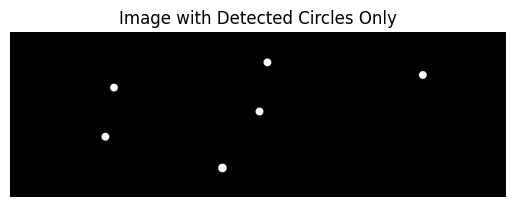

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'your_image.jpg' with your image file path)
image = cv2.imread('build_graph1.png')

# Create a blank canvas with the same dimensions as the original image
height, width, _ = image.shape
blank_canvas = np.zeros((height, width, 3), dtype=np.uint8)

# Convert the image to grayscale for circle detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect circles using the Hough Circle Transform
circles = cv2.HoughCircles(
    gray_image,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=100
)

# Check if circles were found
if circles is not None:
    circles = np.uint16(np.around(circles))

    # Iterate over detected circles and draw them on the blank canvas
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(blank_canvas, center, radius, (255, 255, 255), -1)  # Draw a white filled circle

    # Display the result image with the detected circles
    plt.imshow(cv2.cvtColor(blank_canvas, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Image with Detected Circles Only')
    plt.show()
else:
    print("No circles found in the image.")


Trying out the direct rplanpy module code modification idea

In [30]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import data
import utils


def floorplan_to_color_custom(data: data.RplanData):
    """
    Get an image like object with the color for each pixel

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :return: list of colors for each pixel
    :rtype: list
    """
    coloured_image = [[utils.ROOM_COLOR[pix] for pix in row] for row in data.category]
    return coloured_image


def plot_floorplan_custom(data: data.RplanData, ax=None, title=None):
    """
    Plot a floorplan

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :param ax: optional axes to plot in
    :type ax: matplotlib.axes._subplots.AxesSubplot
    :param title: optional title to add to the plot
    :type title: str
    :return: the plotted axes
    :rtype: matplotlib.axes._subplots.AxesSubplot
    """
    coloured_image = floorplan_to_color_custom(data)
    if ax is None:
        ax = plt.subplot()
    ax.imshow(coloured_image)
    ax.set_title(title)
    ax.axis("off")
    return ax


def plot_floorplan_graph_custom(data: data.RplanData, ax=None, title=None,
                         with_colors=True, edge_label=None):
    """
    Plot the graph representation for a floorplan

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :param ax: optional axes to plot in
    :type ax: matplotlib.axes._subplots.AxesSubplot
    :param title: optional title to add to the plot
    :type title: str
    :param with_colors: optional, whether to colour nodes by their class or not, defaults to True
    :type with_colors: bool
    :return: the plotted axes
    :rtype: matplotlib.axes._subplots.AxesSubplot
    """
    if ax is None:
        ax = plt.subplot()
    G = data.get_graph()
    pos = nx.spring_layout(G)
    if with_colors:
        colors = [np.array(utils.ROOM_COLOR.get(G.nodes[n]['category'], [255, 255, 255]))/255 for n in G.nodes]
        nx.draw(G, pos, with_labels=True, ax=ax, node_color=colors)
    else:
        nx.draw(G, pos, with_labels=True, ax=ax)
    if edge_label:
        edge_labels = nx.get_edge_attributes(G, edge_label)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
    ax.set_title(title)
    return ax

AttributeError: module 'utils' has no attribute 'ROOM_COLOR'

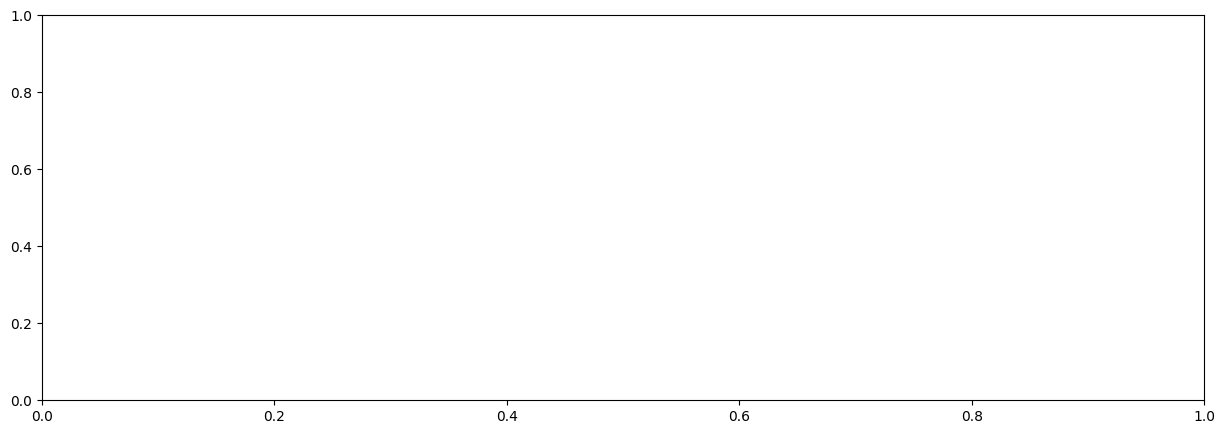

In [35]:
fig1, ax1 = plt.subplots(figsize=(15, 5))
data=rplanpy.data.RplanData(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
# ax[0].set_title("Original Image")
plot_floorplan_graph_custom(data=data, with_colors=True, edge_label=None, ax=ax1,title="Building graph")
plt.tight_layout()
plt.show()


c:\Users\aswin\anaconda3\envs\opentensor\lib\site-packages\rplanpy\data.py:53: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  c = stats.mode(
c:\Users\aswin\anaconda3\envs\opentensor\lib\site-packages\rplanpy\data.py:58: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


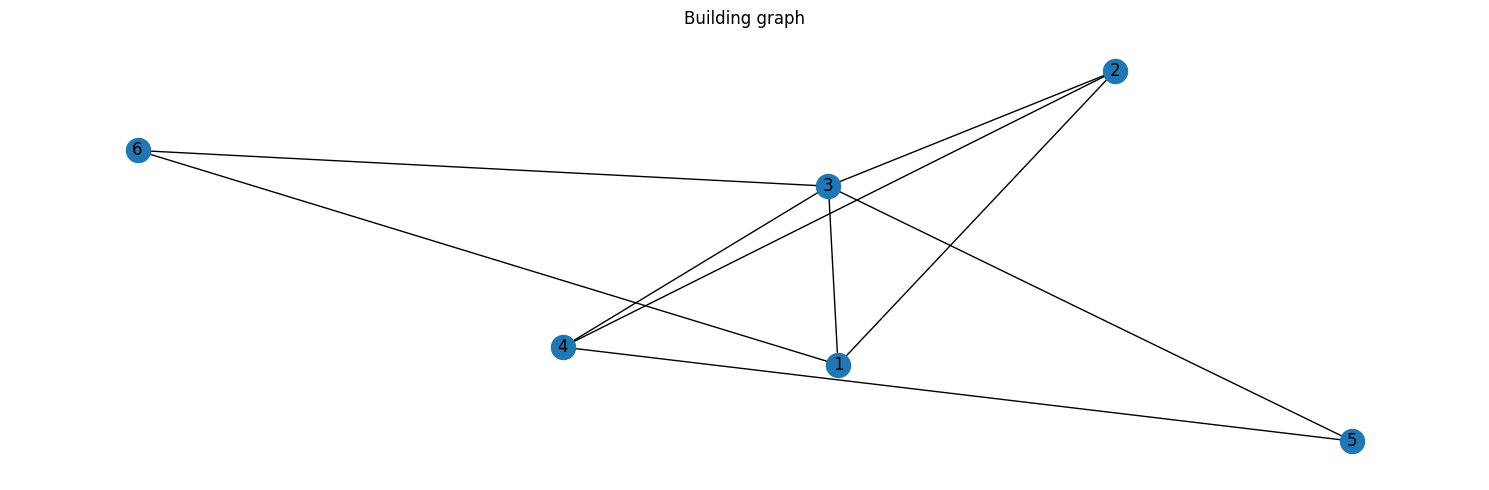

In [42]:
fig1, ax1 = plt.subplots(figsize=(15, 5))
data=rplanpy.data.RplanData(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
# ax[0].set_title("Original Image")
plot_floorplan_graph_custom(data=data, with_colors=False, edge_label=None, ax=ax1,title="Building graph")
plt.tight_layout()
plt.show()


In [37]:
floorplan_to_color_custom(data1)

AttributeError: module 'utils' has no attribute 'ROOM_COLOR'

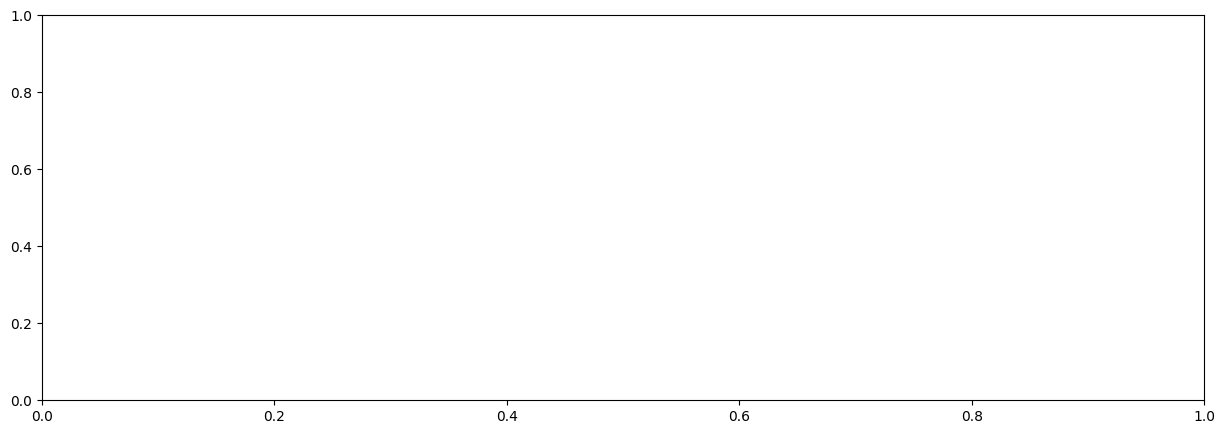

In [43]:
import matplotlib.pyplot as plt
fig2, ax2= plt.subplots(1, 1, figsize=(15, 5))
rplanpy.plot.floorplan_to_color(data=data)
# plt.savefig('build_graph.png')
plt.show()

In [81]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import data
import utils


def floorplan_to_color_custom(data: data.RplanData):
    """
    Get an image like object with the color for each pixel

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :return: list of colors for each pixel
    :rtype: list
    """
    coloured_image = [[utils.ROOM_COLOR[pix] for pix in row] for row in data.category]
    return coloured_image


def plot_floorplan_custom(data: data.RplanData, ax=None, title=None):
    """
    Plot a floorplan

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :param ax: optional axes to plot in
    :type ax: matplotlib.axes._subplots.AxesSubplot
    :param title: optional title to add to the plot
    :type title: str
    :return: the plotted axes
    :rtype: matplotlib.axes._subplots.AxesSubplot
    """
    coloured_image = floorplan_to_color_custom(data)
    if ax is None:
        ax = plt.subplot()
    ax.imshow(coloured_image)
    ax.set_title(title)
    ax.axis("off")
    return ax


def plot_floorplan_graph_custom1(data: data.RplanData, ax=None, title=None,
                         with_colors=True, edge_label=None):
    """
    Plot the graph representation for a floorplan

    :param data: a data object from RPLAN dataset
    :type data: data.RplanData
    :param ax: optional axes to plot in
    :type ax: matplotlib.axes._subplots.AxesSubplot
    :param title: optional title to add to the plot
    :type title: str
    :param with_colors: optional, whether to colour nodes by their class or not, defaults to True
    :type with_colors: bool
    :return: the plotted axes
    :rtype: matplotlib.axes._subplots.AxesSubplot
    """
    if ax is None:
        ax = plt.subplot()
    G = data.get_graph()
    # pos = nx.spring_layout(G)
    pos = nx.spring_layout(G, k=4000)

    if with_colors:
        colors = [np.array(utils.ROOM_COLOR.get(G.nodes[n]['category'], [255, 255, 255]))/255 for n in G.nodes]
        nx.draw(G, pos, with_labels=True, ax=ax, node_color=colors,node_size=900)
    else:
        nx.draw(G, pos, with_labels=True, ax=ax,node_size=9000,edge_color='none')
        print("hello")
    if edge_label:
        edge_labels = nx.get_edge_attributes(G, edge_label)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
    ax.set_title(title)
    return ax

hello


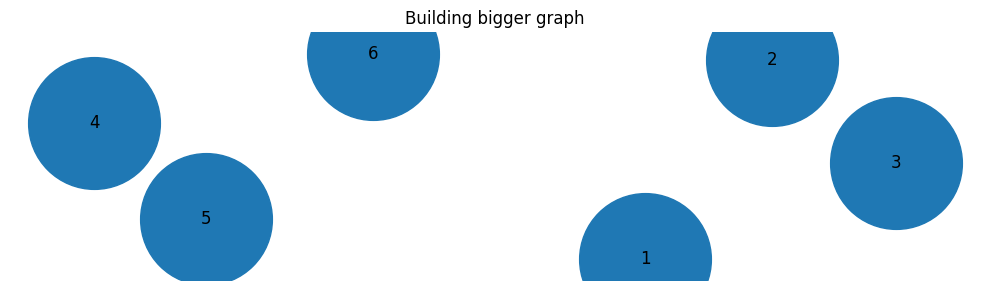

In [82]:
fig2, ax2 = plt.subplots(figsize=(10, 3))
data=rplanpy.data.RplanData(r'E:\Anna University BOOKS & NOTES\SEVENTH SEMESTER\FYP\rplandataset\0.png')
# ax[0].set_title("Original Image")
plot_floorplan_graph_custom1(data=data, with_colors=False, edge_label=None, ax=ax2,title="Building bigger graph")
plt.tight_layout()
plt.show()
